<a href="https://colab.research.google.com/github/AdityaJaiswal14/EV-Market-Segmentation/blob/main/India_EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [ ]:
operational_pc = pd.read_csv('OperationalPC.csv')
vehicle_class = pd.read_csv('Vehicle Class - All.csv')
ev_sales = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
ev_cat = pd.read_csv('ev_cat_01-24.csv')
ev_maker_place = pd.read_csv('EV Maker by Place.csv')

In [ ]:
operational_pc.head()
operational_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [ ]:
vehicle_class.head()
vehicle_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle Class       16 non-null     object
 1   Total Registration  16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


In [ ]:
ev_sales.head()
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [ ]:
ev_cat.head()
ev_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             284 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64 
 2   HEAVY GOODS VEHICLE              284 non-null    int64 
 3   HEAVY MOTOR VEHICLE              284 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64 
 5   LIGHT GOODS VEHICLE              284 non-null    int64 
 6   LIGHT MOTOR VEHICLE              284 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64 
 8   MEDIUM GOODS VEHICLE             284 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       284 non-null    int64 
 12  THREE WHEELER(NT)                284

In [ ]:
ev_maker_place.head()
ev_maker_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


# VISUALIZATIONS

In [ ]:
# Helper function to create bar plots
def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

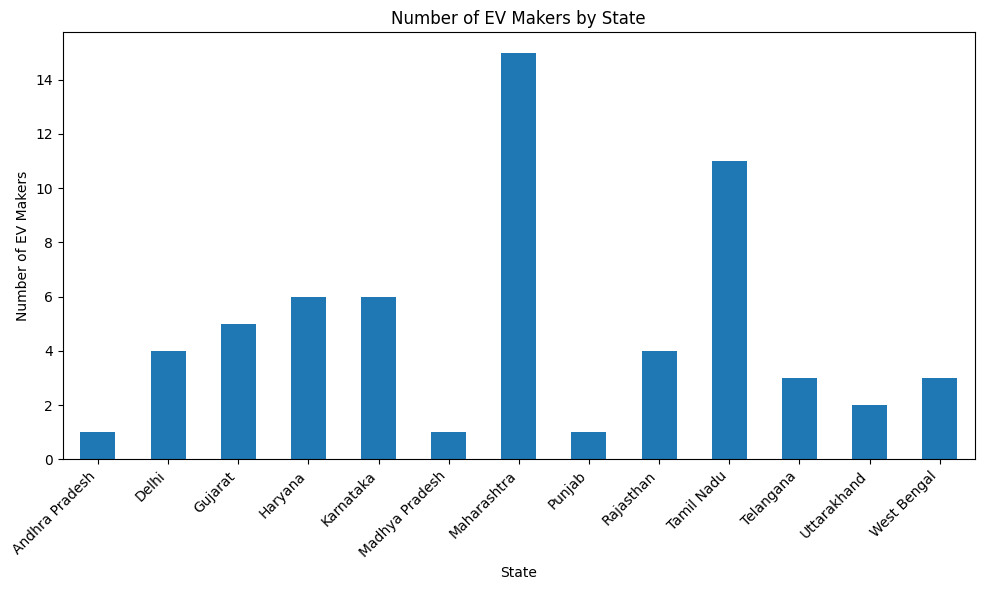

In [ ]:
# EV Maker by Place
ev_maker_by_place = ev_maker_place.groupby('State').size()
create_bar_plot(ev_maker_by_place, 'Number of EV Makers by State', 'State', 'Number of EV Makers')

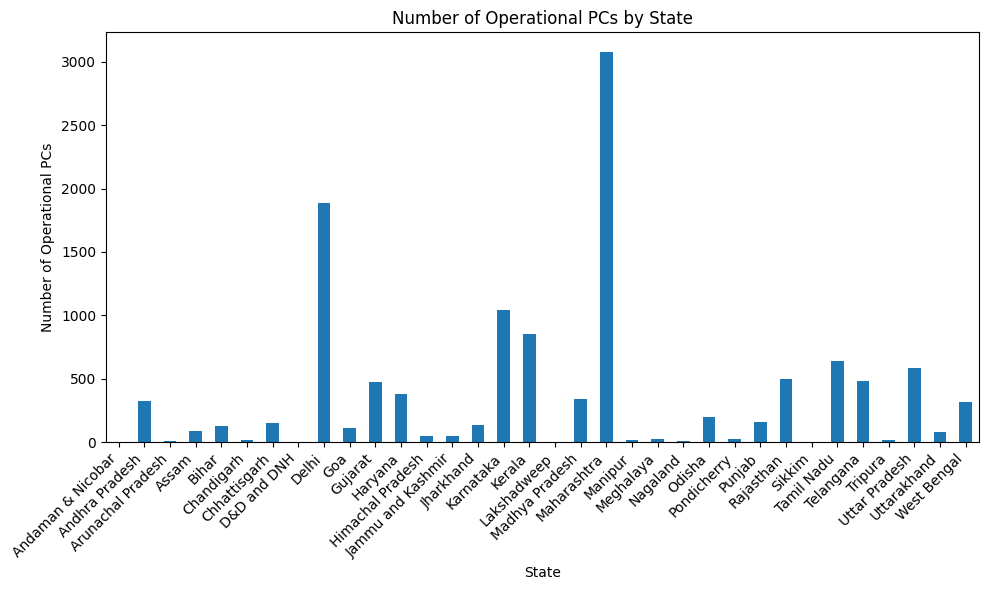

In [ ]:
# OperationalPC
operational = operational_pc.set_index('State')
create_bar_plot(operational['No. of Operational PCS'], 'Number of Operational PCs by State', 'State', 'Number of Operational PCs')

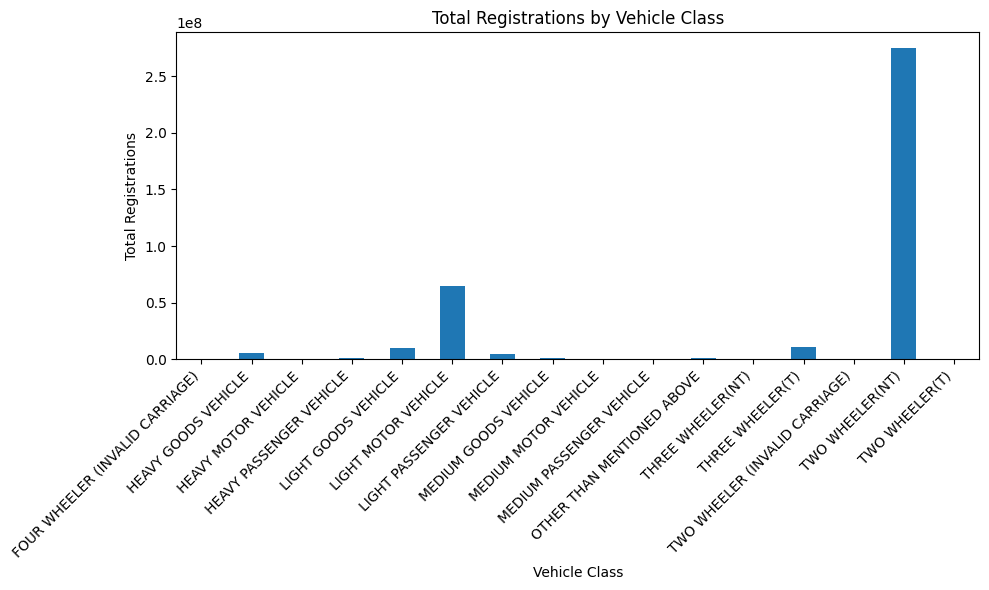

In [ ]:
vehicle_class_all = vehicle_class.set_index('Vehicle Class')

# Clean the 'Total Registration' column by removing commas and converting to integers
vehicle_class_all['Total Registration'] = vehicle_class_all['Total Registration'].str.replace(',', '').astype(int)

# Now, let's recreate the bar plot for "Vehicle Class - All"
create_bar_plot(vehicle_class_all['Total Registration'], 'Total Registrations by Vehicle Class', 'Vehicle Class', 'Total Registrations')

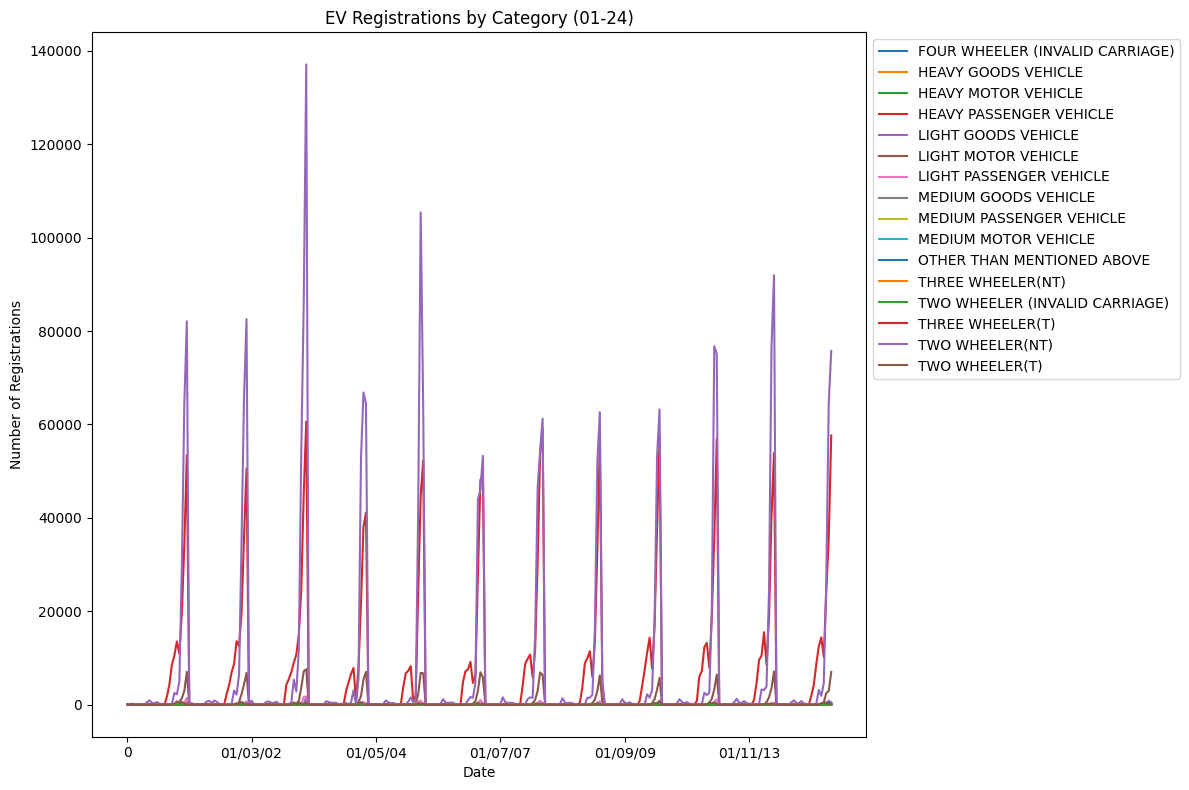

In [ ]:
# EV Category 01-24 - Time Series Plot
ev_category = ev_cat.set_index('Date')
ev_category.plot(figsize=(12, 8))
plt.title('EV Registrations by Category (01-24)')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

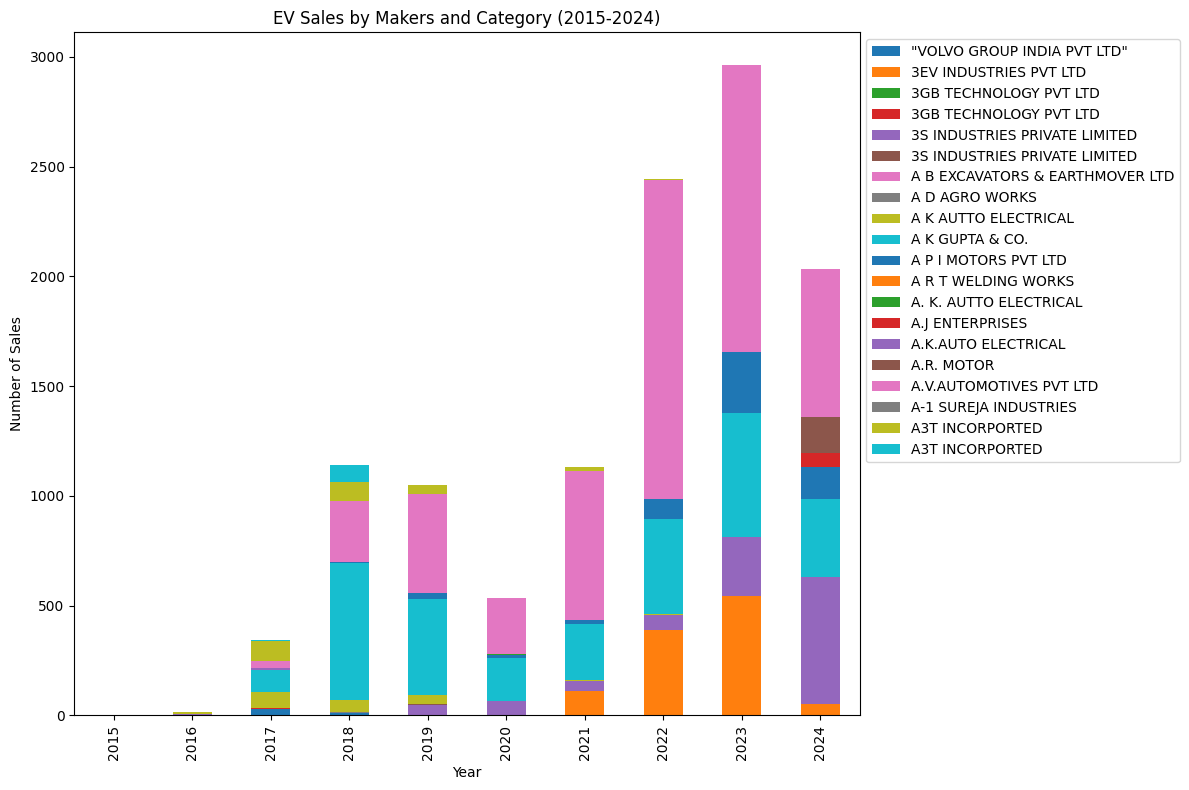

In [ ]:
# EV Sales by Makers and Category 15-24 (plotting for top 20 given number of makers)
ev_sales_1 = ev_sales.set_index('Maker')[:20]
ev_sales_1.drop(columns=['Cat'], inplace=True)
ev_sales_1.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('EV Sales by Makers and Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

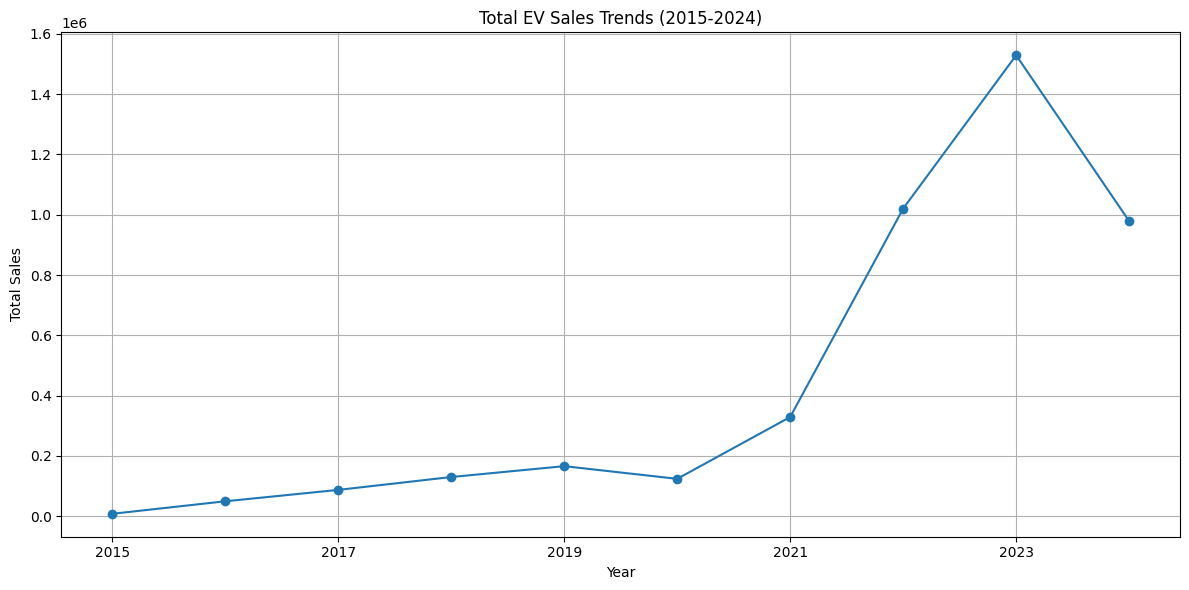

In [ ]:
# EV Sales by Makers and Category (2015-2024) - Data Preparation
ev_sales_2 = ev_sales.set_index('Maker')
ev_sales_2.drop(columns=['Cat'], inplace=True)

# Calculate the total sales per year
total_sales_by_year = ev_sales_2.sum()

# Plot the total EV sales trends over the years
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(marker='o')
plt.title('Total EV Sales Trends (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

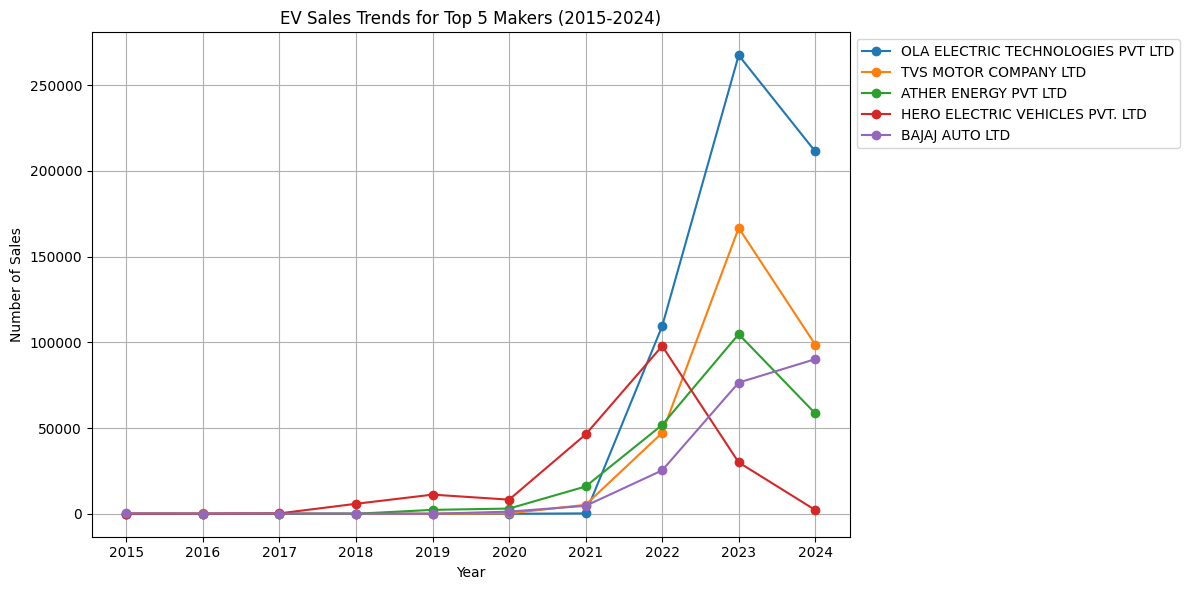

In [ ]:
# Consolidate the data by summing sales for makers with duplicate entries
ev_sales_consolidated = ev_sales_2.groupby(ev_sales_2.index).sum()

# Re-select the top 5 EV makers based on the consolidated data
top_ev_makers_consolidated = ev_sales_consolidated.sum(axis=1).sort_values(ascending=False).head(5).index
ev_sales_top_makers_consolidated = ev_sales_consolidated.loc[top_ev_makers_consolidated]

# Plot trends for the top 5 EV makers after consolidation
plt.figure(figsize=(12, 6))
for maker in ev_sales_top_makers_consolidated.index:
    plt.plot(ev_sales_top_makers_consolidated.columns, ev_sales_top_makers_consolidated.loc[maker], marker='o', label=maker)

plt.title('EV Sales Trends for Top 5 Makers (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

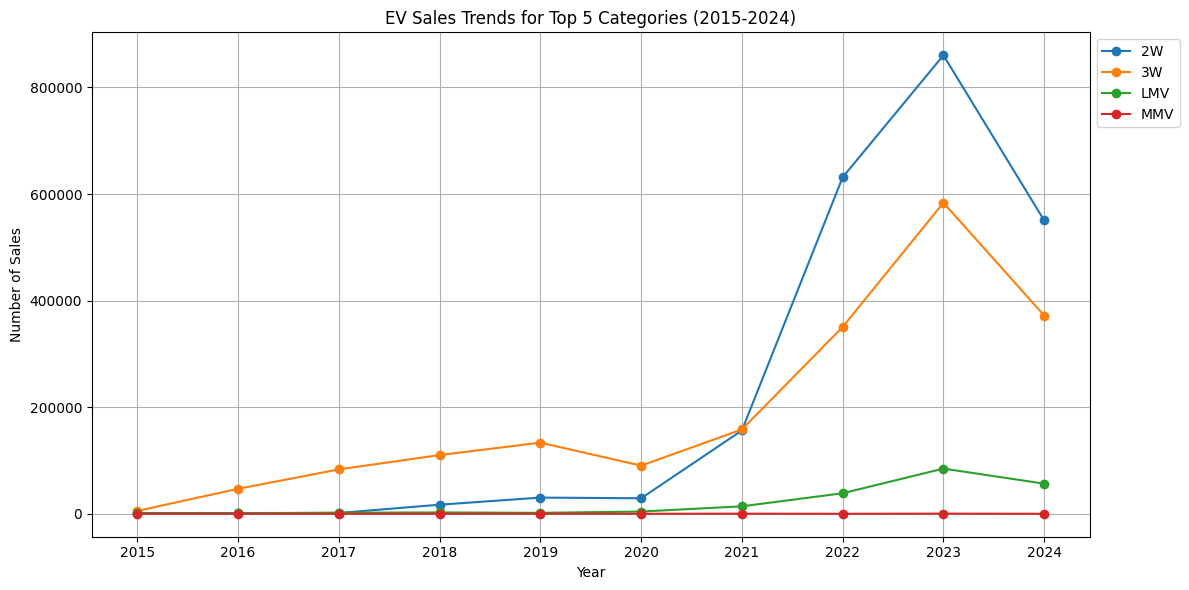

In [ ]:
# Select the 'EV Sales by Makers and Category' dataset
ev_sales_cat = ev_sales

# Group by 'Cat' to sum up sales across all makers (remove erroneous drop)
ev_sales_by_category = ev_sales_cat.groupby('Cat').sum(numeric_only=True)

# Identify the top 5 categories by total sales
top_5_categories = ev_sales_by_category.sum(axis=1).sort_values(ascending=False).head(5).index

# Extract data for the top 5 categories
ev_sales_top_categories = ev_sales_by_category.loc[top_5_categories]

# Plot the sales trends for the top 5 categories
plt.figure(figsize=(12, 6))
for category in ev_sales_top_categories.index:
    plt.plot(ev_sales_top_categories.columns, ev_sales_top_categories.loc[category], marker='o', label=category)

plt.title('EV Sales Trends for Top 5 Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

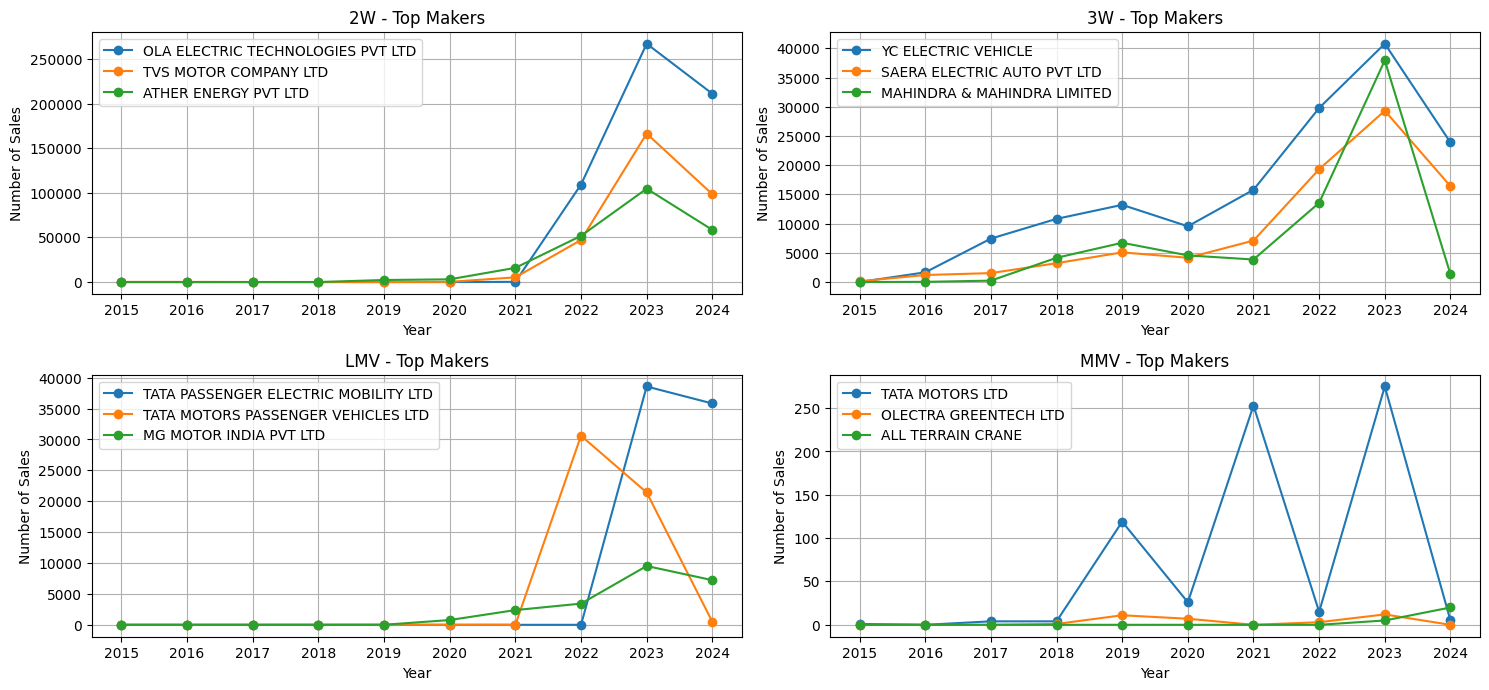

In [ ]:
# First, let's identify the top makers within each of the top 5 categories
top_makers_per_category = {}

for category in top_5_categories:
    category_data = ev_sales_cat[ev_sales_cat['Cat'] == category]
    top_makers = category_data.groupby('Maker').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(3).index
    top_makers_per_category[category] = top_makers

# Now, let's plot the sales trends for the top makers within each of these categories
plt.figure(figsize=(15, 10))

for i, (category, makers) in enumerate(top_makers_per_category.items(), 1):
    plt.subplot(3, 2, i)
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        plt.plot(maker_data.columns[2:], maker_data.iloc[0, 2:], marker='o', label=maker)
    plt.title(f'{category} - Top Makers')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

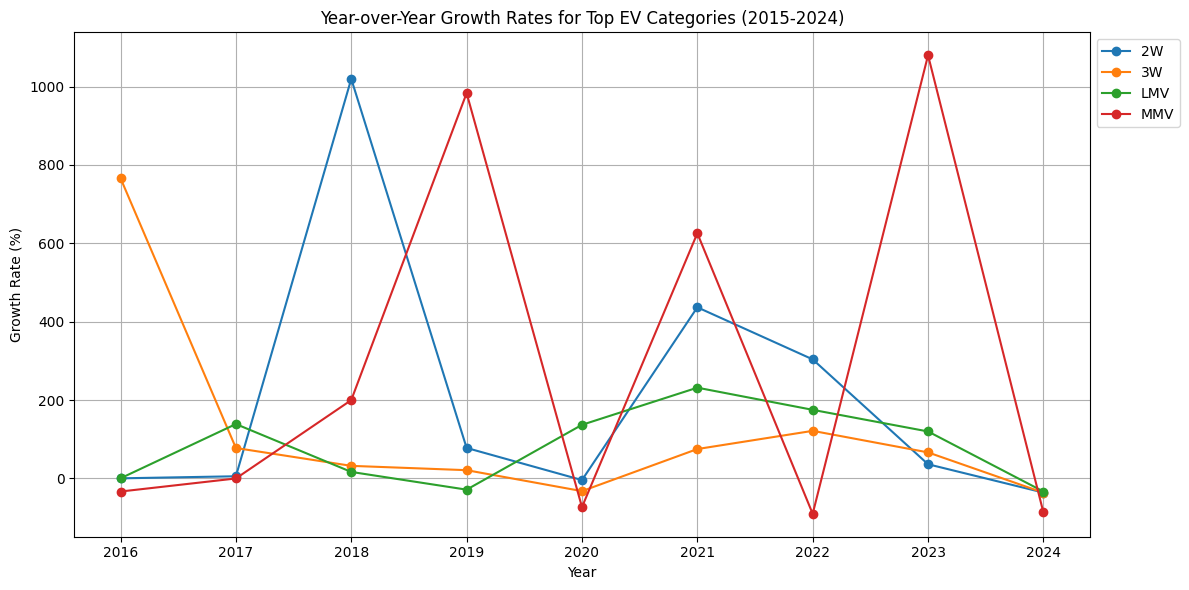

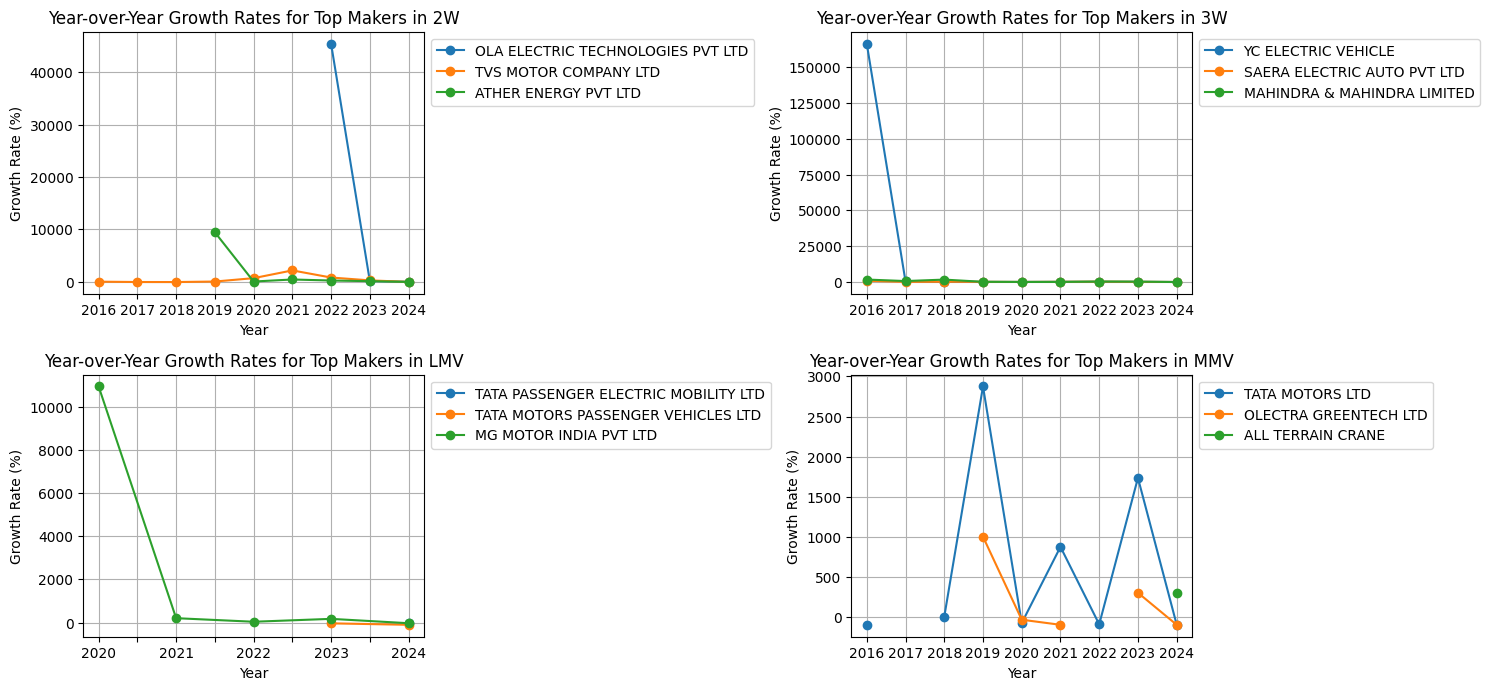

In [ ]:
# Calculate year-over-year growth rates for top categories
category_growth_rates = ev_sales_top_categories.pct_change(axis=1) * 100

# Plot growth rates for top categories
plt.figure(figsize=(12, 6))
for category in category_growth_rates.index:
    plt.plot(category_growth_rates.columns, category_growth_rates.loc[category], marker='o', label=category)

plt.title('Year-over-Year Growth Rates for Top EV Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Now calculate year-over-year growth rates for top makers within top categories
maker_growth_rates = {}
for category, makers in top_makers_per_category.items():
    growth_rates = []
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        growth_rate = maker_data.iloc[0, 2:].pct_change() * 100
        growth_rates.append(growth_rate)
    maker_growth_rates[category] = pd.concat(growth_rates, axis=1)
    maker_growth_rates[category].columns = makers

# Plot growth rates for top makers within each category
plt.figure(figsize=(15, 10))

for i, (category, growth_rates) in enumerate(maker_growth_rates.items(), 1):
    plt.subplot(3, 2, i)
    growth_rates.plot(ax=plt.gca(), marker='o')
    plt.title(f'Year-over-Year Growth Rates for Top Makers in {category}')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)

plt.tight_layout()
plt.show()

# MODEL BUILDING

In [ ]:
# Create a new dataframe ev_sales_df_processed after dropping the columns Cat and Maker from the dataframe.
ev_sales_df_processed = ev_sales.drop(columns=['Cat', 'Maker'])

# Display the first 5 rows of ev_sales_df_processed
print(ev_sales_df_processed.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types of ev_sales_df_processed
print(ev_sales_df_processed.info())

| 2015   | 2016   | 2017   | 2018   | 2019   | 2020   | 2021   | 2022   | 2023   | 2024   |
|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|
| 0      | 0      | 31     | 12     | 0      | 0      | 0      | 0      | 0      | 0      |
| 0      | 0      | 0      | 0      | 0      | 0      | 112    | 390    | 545    | 51     |
| 0      | 0      | 0      | 1      | 0      | 0      | 0      | 0      | 0      | 0      |
| 0      | 1      | 1      | 0      | 0      | 0      | 0      | 0      | 0      | 0      |
| 0      | 0      | 0      | 0      | 48     | 66     | 43     | 68     | 266    | 578    |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    1386 non-null   int64
 1   2016    1386 non-null   int64
 2   2017    1386 non-null   int64
 3   2018    1386 non-null   int64
 4   2019    1386 non-null   int64
 5  

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of k from 1 to 10.
# Store the inertia for each value of k.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ev_sales_df_processed)
    inertia.append(kmeans.inertia_)

# Print the cluster number and corresponding inertia.
for i, inertia_value in enumerate(inertia):
    print(f"Cluster Number: {i + 1}, Inertia: {inertia_value}")

Cluster Number: 1, Inertia: 251666841125.86456
Cluster Number: 2, Inertia: 97652139055.92743
Cluster Number: 3, Inertia: 49655622264.771576
Cluster Number: 4, Inertia: 30395707826.10474
Cluster Number: 5, Inertia: 25545244686.271378
Cluster Number: 6, Inertia: 13154041875.306278
Cluster Number: 7, Inertia: 12203688802.806286
Cluster Number: 8, Inertia: 8107346165.204718
Cluster Number: 9, Inertia: 7156993092.704716
Cluster Number: 10, Inertia: 6547127926.372948


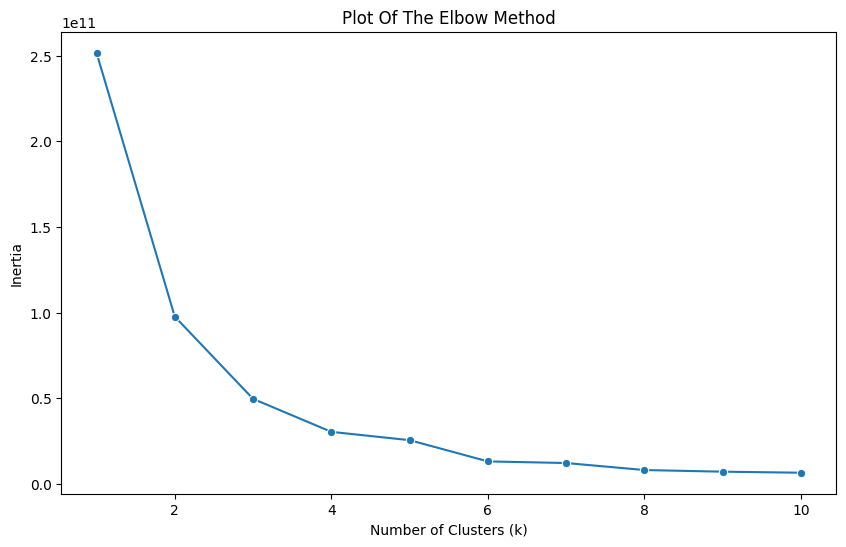

In [ ]:
inertia_df = pd.DataFrame({'Cluster Number': range(1, 11), 'Inertia': inertia})

# Plot the inertia for each value of k
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cluster Number', y='Inertia', data=inertia_df, marker='o')
plt.title('Plot Of The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Fit the KMeans model to the data using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(ev_sales_df_processed)

# Add the cluster assignments as a new column to the original dataset
ev_sales['Cluster'] = kmeans.labels_

# Print the number of samples in each cluster
print(ev_sales['Cluster'].value_counts().to_markdown(numalign="left", stralign="left"))

# # Calculate the mean sales for each cluster across all the years
# cluster_means = ev_sales.groupby('Cluster').mean()

# # Display the mean sales for each cluster across all the years
# print(cluster_means.to_markdown(index=False, numalign="left", stralign="left"))

# Calculate the mean sales for each cluster across all the years
# The following line is updated to only calculate the mean of numeric columns.
cluster_means = ev_sales.groupby('Cluster').agg('mean', numeric_only=True)

# Display the mean sales for each cluster across all the years
print(cluster_means.to_markdown(index=False, numalign="left", stralign="left"))

| Cluster   | count   |
|:----------|:--------|
| 0         | 1378    |
| 2         | 6       |
| 1         | 2       |
| 2015    | 2016    | 2017    | 2018    | 2019    | 2020    | 2021    | 2022    | 2023    | 2024    |
|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|
| 5.38752 | 34.3251 | 57.3149 | 75.9478 | 91.4688 | 66.1655 | 143.404 | 345.231 | 561.21  | 367.239 |
| 82.5    | 85.5    | 34.5    | 11.5    | 15      | 116.5   | 2749    | 78290   | 216968  | 154894  |
| 27.1667 | 296.333 | 1328.33 | 4180.67 | 6618.67 | 5393.5  | 20957.5 | 64704   | 53658.7 | 27183   |


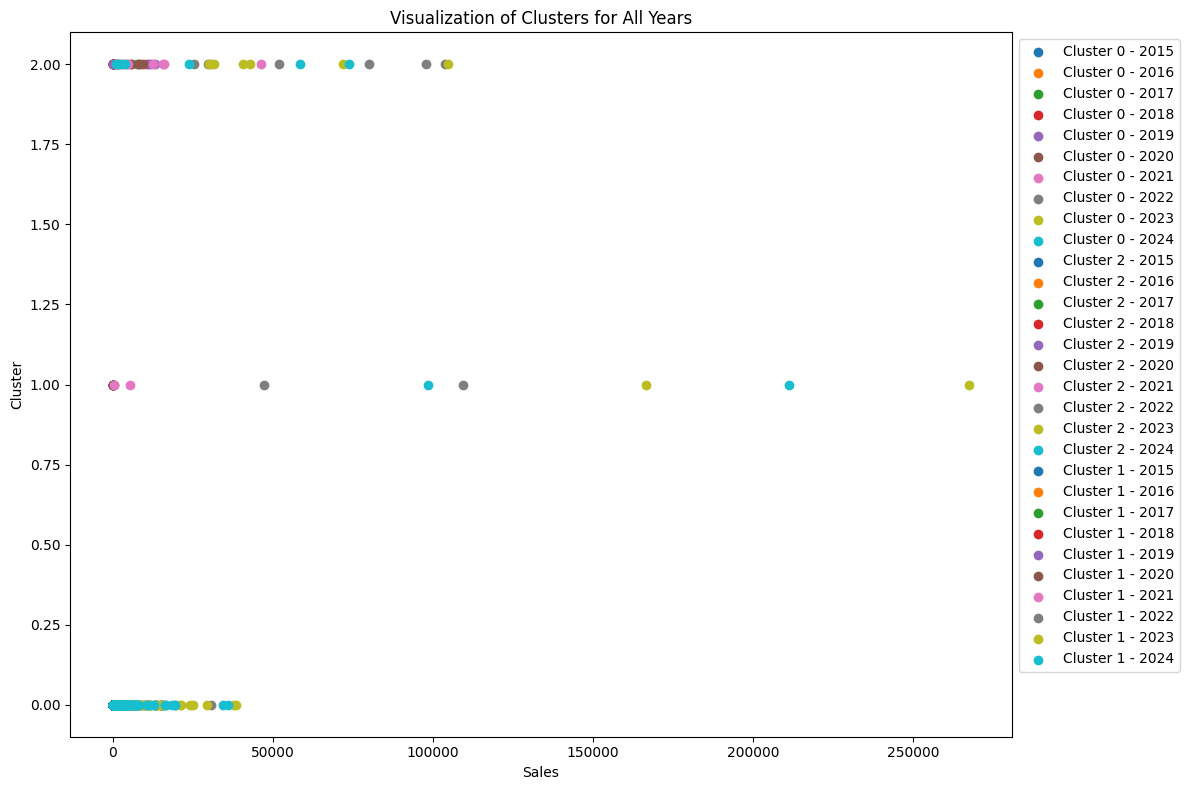

In [ ]:
# Visualize the clusters for all the years
plt.figure(figsize=(12, 8))
for cluster in ev_sales['Cluster'].unique():
    cluster_data = ev_sales[ev_sales['Cluster'] == cluster]
    for year in ev_sales_df_processed.columns:
        plt.scatter(cluster_data[year], [cluster] * len(cluster_data), label=f'Cluster {cluster} - {year}')

plt.xlabel('Sales')
plt.ylabel('Cluster')
plt.title('Visualization of Clusters for All Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


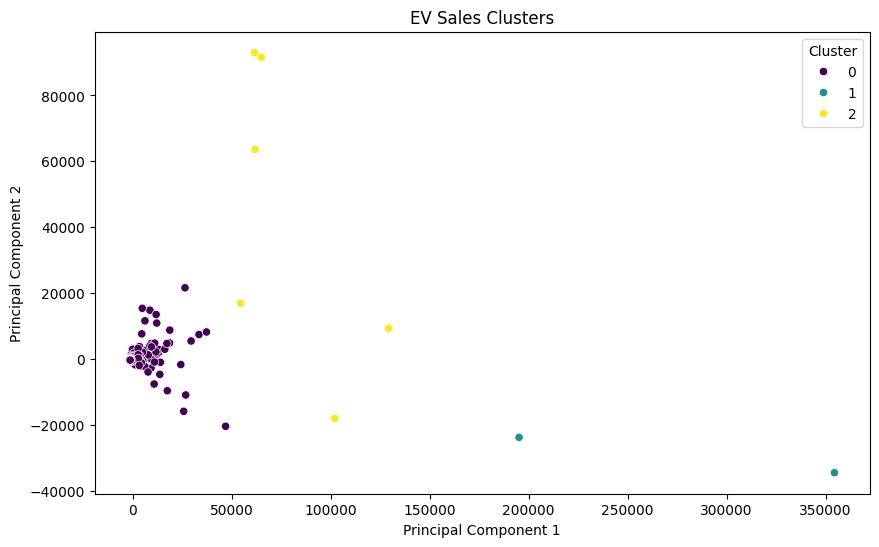

In [ ]:
from sklearn.decomposition import PCA

# Assuming ev_sales_df_processed is the DataFrame you want to use for PCA
X = ev_sales_df_processed

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Create a DataFrame with the reduced data and cluster labels
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('EV Sales Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

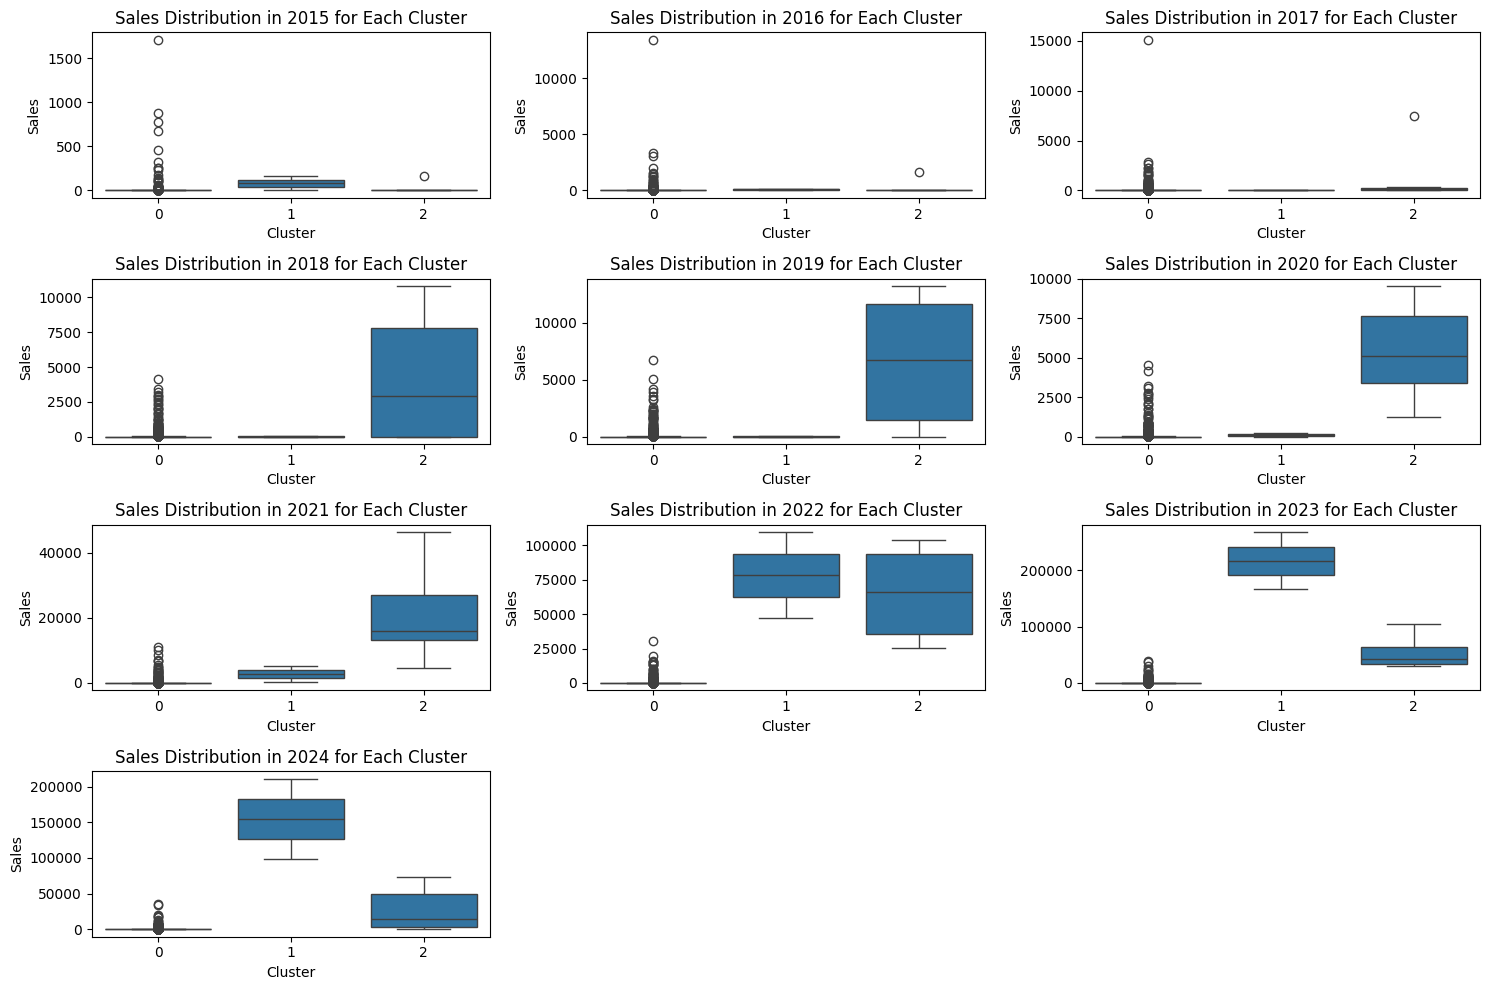

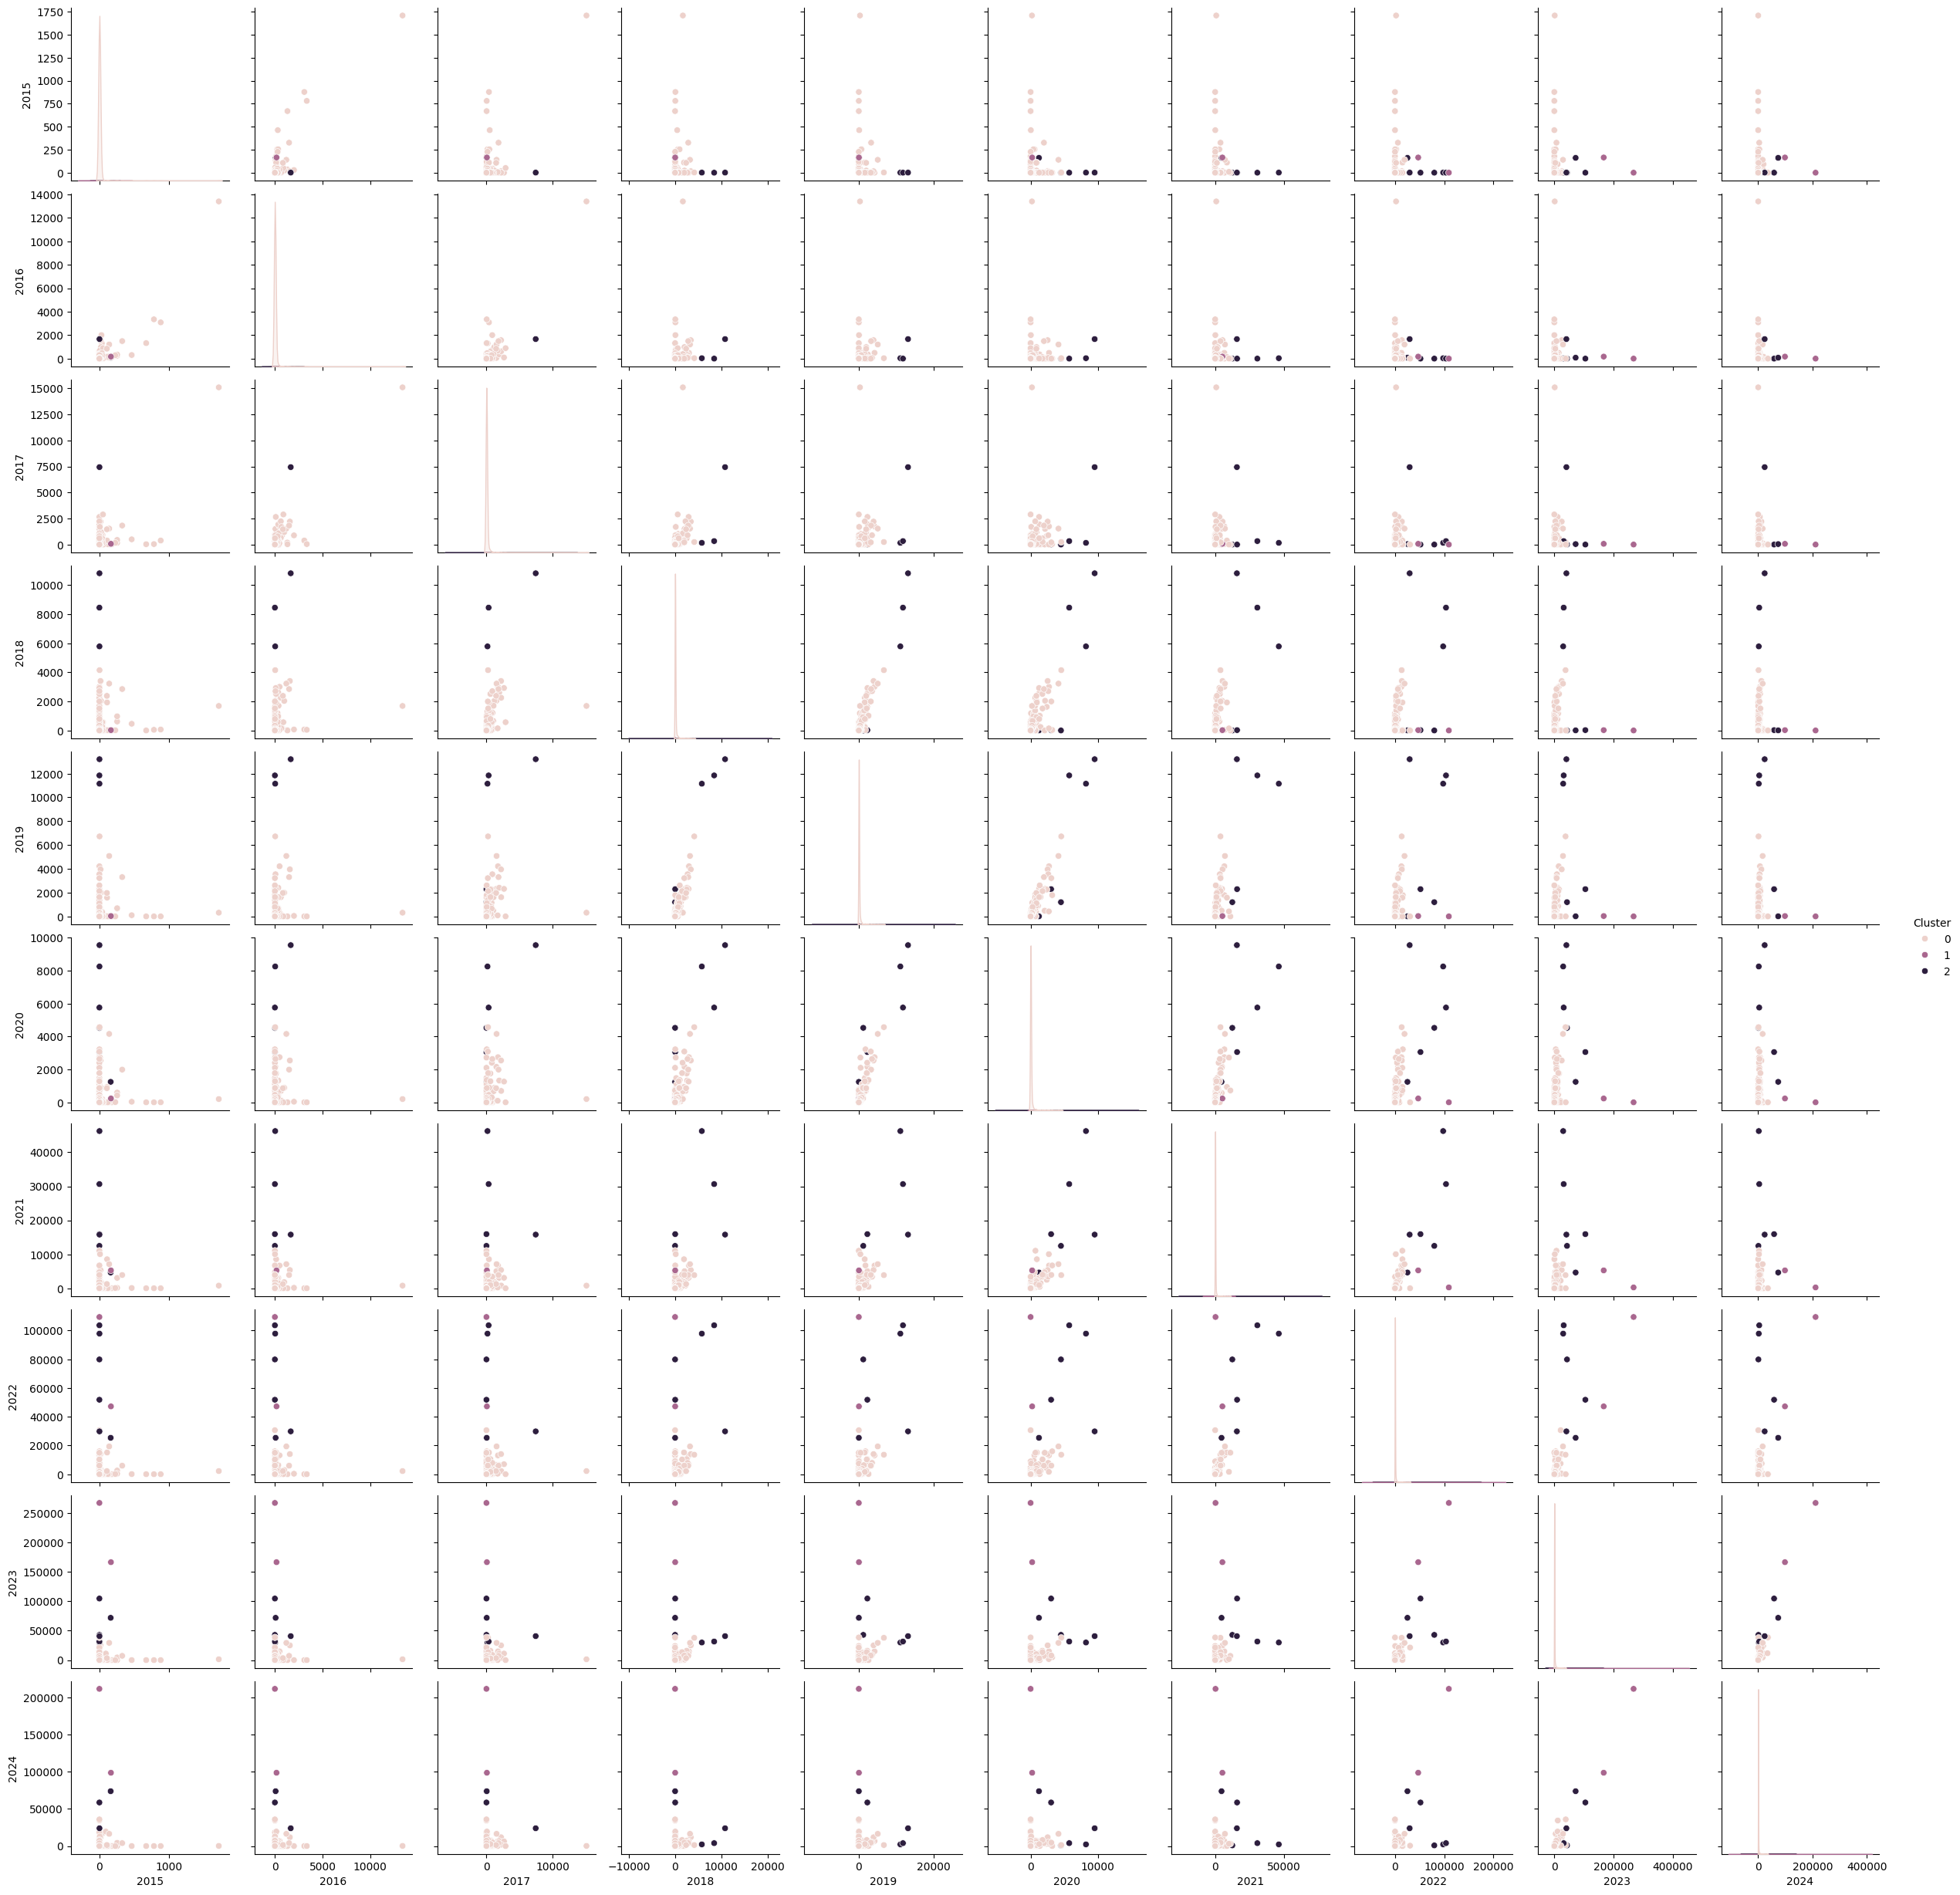

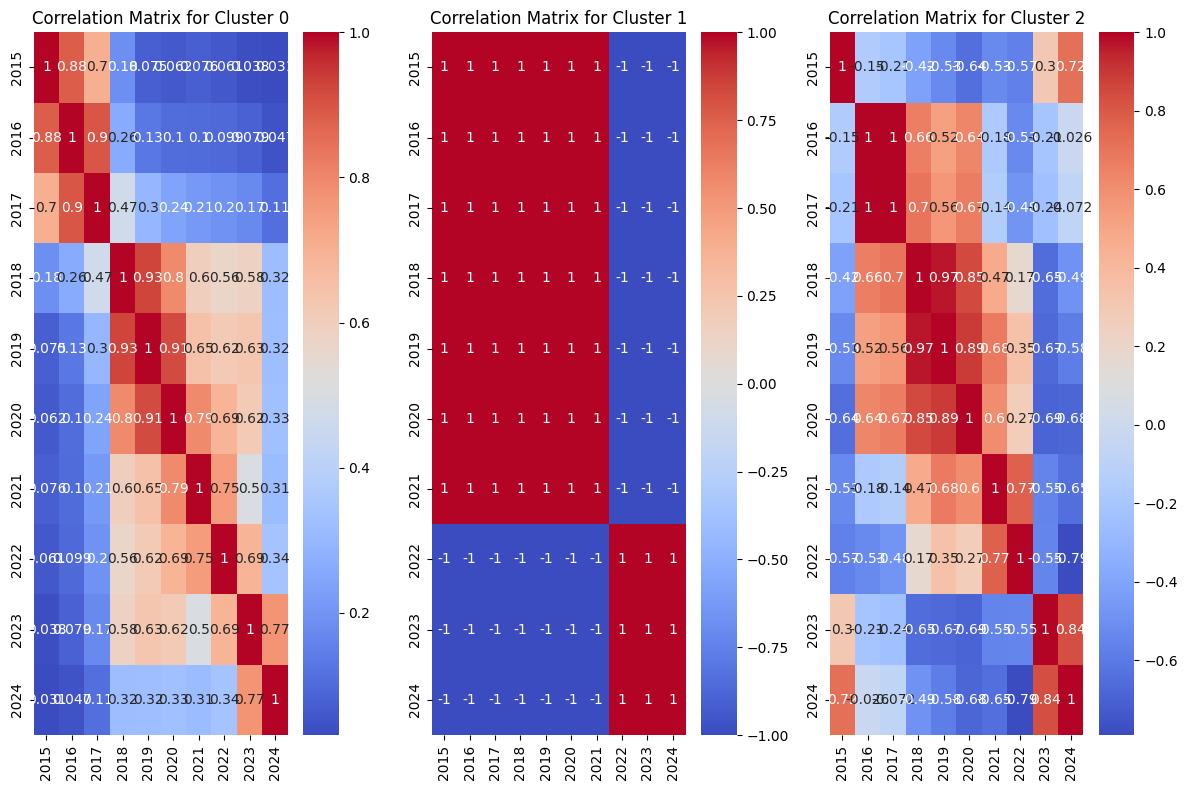

In [ ]:
# prompt: plot more visualizations for the clusters

# # Visualize the clusters using a boxplot for each year
# plt.figure(figsize=(15, 10))
# for i, year in enumerate(ev_sales_df_processed.columns, 1):
#   plt.subplot(3, 3, i)
#   sns.boxplot(x='Cluster', y=year, data=ev_sales)
#   plt.title(f'Sales Distribution in {year} for Each Cluster')
#   plt.xlabel('Cluster')
#   plt.ylabel('Sales')

# plt.tight_layout()
# plt.show()

# Visualize the clusters using a boxplot for each year
plt.figure(figsize=(15, 10))
# Updated subplot grid to 4x3 to accommodate 10 plots
for i, year in enumerate(ev_sales_df_processed.columns, 1):
  plt.subplot(4, 3, i) # Adjusted the grid to 4 rows and 3 columns
  sns.boxplot(x='Cluster', y=year, data=ev_sales)
  plt.title(f'Sales Distribution in {year} for Each Cluster')
  plt.xlabel('Cluster')
  plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# Create a pairplot to visualize the relationship between the years and the clusters
sns.pairplot(ev_sales, hue='Cluster', vars=ev_sales_df_processed.columns)
plt.show()


# Create a heatmap to show the correlation between the years within each cluster
plt.figure(figsize=(12, 8))
for cluster in ev_sales['Cluster'].unique():
  cluster_data = ev_sales[ev_sales['Cluster'] == cluster]
  correlation_matrix = cluster_data[ev_sales_df_processed.columns].corr()
  plt.subplot(1, 3, cluster + 1)
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Correlation Matrix for Cluster {cluster}')

plt.tight_layout()
plt.show()
